******************** Train Data read ********************
     LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0            8             3           2                     0             0   
1            0             5           2                     0             0   
2            1             9           1                     0             0   
3            6             5           1                     2             3   
4           19            15           3                     2            35   
..         ...           ...         ...                   ...           ...   
470          1             3           0                     0             0   
471          0             9           0                     1             0   
472         32            39           8                     3            23   
473          4             3           1                     0             2   
474         28            27          12                     0

[Voting] ..................... (1 of 3) Processing SVM:, total=   0.1s
[Voting] ..................... (2 of 3) Processing ANN:, total=   0.3s
[Voting] ..................... (3 of 3) Processing NBG:, total=   0.0s


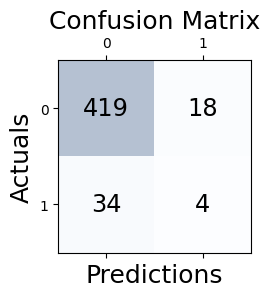

precision is: 0.18181818181818182
Recall is: 0.10526315789473684
0.9588100686498856
Specificity is: 0.9588100686498856
PNV is: 0.9249448123620309
Area under curve(AUC): 0.73
F-Measure is: 0.13

              precision    recall  f1-score   support

           N       0.92      0.96      0.94       437
           Y       0.18      0.11      0.13        38

    accuracy                           0.89       475
   macro avg       0.55      0.53      0.54       475
weighted avg       0.87      0.89      0.88       475

Traininng Accuracy is 89.05
Misclassification Rate is:10.95
0.9588100686498856
False Positive Ratio is:  0.041189931350114395
False Negative Ratio is:  0.8947368421052632


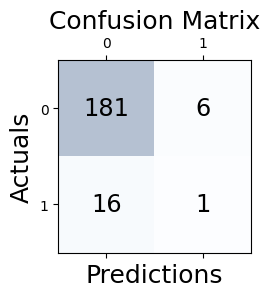

precision is: 0.14285714285714285
Recall is: 0.058823529411764705
Specificity is: 0.9679144385026738
PNV is: 0.9187817258883249
Area under curve(AUC): 0.69
F-Measure is: 0.08

              precision    recall  f1-score   support

           N       0.92      0.97      0.94       187
           Y       0.14      0.06      0.08        17

    accuracy                           0.89       204
   macro avg       0.53      0.51      0.51       204
weighted avg       0.85      0.89      0.87       204

Testing accuracy is 89.22
Misclassification Rate is:10.78
False Positive Ratio is:  0.03208556149732622
False Negative Ratio is:  0.9411764705882353


In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer


#-----------Fetching train and test data from root directory---------------#

dataset_url = "./CM1_Train.csv"
train_data = pd.read_csv(dataset_url)
print("*" * 20 + ' Train Data read ' + "*" * 20)
print(train_data)


dataset_url = "./CM1_Test.csv"
test_data = pd.read_csv(dataset_url)
print("*" * 20 + ' Test Data read ' + "*" * 20)
print(test_data);

#X_train, X_test has training & testing data
X_train=train_data.drop(columns='Defective')
print(X_train)
X_test = test_data.drop(columns='Defective')
print(X_test);

#Y_train, Y_test has train/test class lables 
Y_train = train_data["Defective"]
Y_test = test_data["Defective"]
print(Y_train)
print(Y_test)

#---------------applying mean imputation method for data cleaning---------------------#

# Set a fixed random seed
np.random.seed(42)

# Create a SimpleImputer object with strategy='mean'
imputer = SimpleImputer(strategy='mean')
# Perform mean imputation on the train dataset
imputed_data = imputer.fit_transform(X_train)


# Create a SimpleImputer object with strategy='mean'
imputer = SimpleImputer(strategy='mean')
# Perform mean imputation on the test dataset
imputed_data = imputer.fit_transform(X_test)


#---------------applying normalization---------------------#
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the dataset and transform the dataset
normalized_dataset = scaler.fit_transform(X_train)
print("Original Train dataset:")
print(X_train)
print("\nNormalized Train dataset:")
print(normalized_dataset)

normalized_dataset = scaler.fit_transform(X_test)
print("Original Test dataset:")
print(X_test)
print("\nNormalized test dataset:")
print(normalized_dataset)

#---------------applying voting ensemble---------------------#

voting_classifiers=[
    ['RF:',RandomForestClassifier(criterion="gini",max_depth=10,n_estimators=500,max_features=None,random_state=0)],
    #['DT:',DecisionTreeClassifier(criterion="gini", max_depth=5 ,  min_samples_split =5, random_state=0,ccp_alpha=0.1)],
    ['SVM:',svm.SVC(kernel='poly', C=2,probability=True,random_state=0)],
    ['ANN:',MLPClassifier(hidden_layer_sizes=(2,10,10),max_iter=1000)],
    ['NBG:',GaussianNB()]]
    
clf=VotingClassifier(estimators=voting_classifiers, voting='soft',verbose=1,)
print(clf.get_params())

#----------------training model--------------------------#

clf=clf.fit(X_train,Y_train)

#----------------get training predictios-----------------#

training_predictions= clf.predict(X_train)
#print(training_predictions);

#-----------------generate training confusion matrix--------#

confusion_matrix(Y_train,training_predictions,labels = ['N','Y'])

#----------------draw training confusion matrix--------------#

conf_matrix = confusion_matrix(Y_train,training_predictions)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#-----------------get evaluation matrix of training data------------------#

#precision
precision = precision_score(Y_train,training_predictions,pos_label='Y')
print ("precision is: " + str(precision))


#recall
recall = recall_score(Y_train,training_predictions,pos_label='Y')
print ("Recall is: " + str(recall))


#specificity https://stackoverflow.com/questions/33275461/specificity-in-scikit-learn
specificity = recall_score(Y_train,training_predictions,pos_label='N')
print (specificity)
print ("Specificity is: " + str(specificity))

#PNV predicted negative values_https://stackoverflow.com/questions/55622544/generate-negative-predictive-value-using-cross-val-score-in-sklearn-for-model-pe
PNV = precision_score(Y_train,training_predictions,pos_label='N')
print ("PNV is: " + str(PNV))

# predict probabilities
pred_prob = clf.predict_proba(X_train)[::,1]
#print(pred_prob)

# auc scores
auc = metrics.roc_auc_score(Y_train, pred_prob)
print("Area under curve(AUC): " + str(round(auc,2)))

f_measure=f1_score(Y_train, training_predictions,pos_label='Y')
print ("F-Measure is: " + str(round(f_measure,2))+'\n')

print(classification_report(Y_train,training_predictions))

#--------------------get training accuracy-------------------#

tarining_accuracy=clf.score(X_train, Y_train)
#print(tarining_accuracy*100)
print("Traininng Accuracy is " +str(round(tarining_accuracy*100,2)));

#---------------Misclassification rate----------------------#
misclassification_rate = 1-tarining_accuracy
print ("Misclassification Rate is:" +str(round(misclassification_rate*100,2)));

#----------------False positive ratio----------------------#
print (specificity)
False_positive_Ratio = 1-specificity

print ("False Positive Ratio is: ", + False_positive_Ratio)

#----------------False negative ratio--------------------#
False_negative_ratio = 1-recall
print ("False Negative Ratio is: ", + False_negative_ratio)

#------------------get test predictions--------------------#

predictions = clf.predict(X_test)
#print(predictions);

#--------------generate test confusion matrix---------------#

confusion_matrix(Y_test,predictions,labels = ['N','Y'])

#--------------draw test  confusion matrix------------------#

conf_matrix = confusion_matrix(Y_test, predictions)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


#-----------------get evaluation matrix of testing data------------------#

#precision
precision = precision_score(Y_test,predictions,pos_label='Y')
print ("precision is: " + str(precision))

#recall
recall = recall_score(Y_test,predictions,pos_label='Y')
print ("Recall is: " + str(recall))

#specificity https://stackoverflow.com/questions/33275461/specificity-in-scikit-learn
specificity = recall_score(Y_test,predictions,pos_label='N')
print ("Specificity is: " + str(specificity))

#PNV predicted negative values_https://stackoverflow.com/questions/55622544/generate-negative-predictive-value-using-cross-val-score-in-sklearn-for-model-pe
PNV = precision_score(Y_test,predictions,pos_label='N')
print ("PNV is: " + str(PNV))


# predict probabilities
pred_prob = clf.predict_proba(X_test)[::,1]
#print(pred_prob)

# auc scores
auc = metrics.roc_auc_score(Y_test, pred_prob)
print("Area under curve(AUC): " + str(round(auc,2)))

f_measure=f1_score(Y_test, predictions,pos_label='Y')
print ("F-Measure is: " + str(round(f_measure,2))+'\n')

print(classification_report(Y_test,predictions))

#--------------------get testing accuracy-------------------#

testing_accuracy=accuracy_score(Y_test, predictions)
#print(testing_accuracy*100)
print("Testing accuracy is " + str(round(testing_accuracy*100,2)));

#---------------Misclassification rate----------------------#
misclassification_rate = 1-testing_accuracy
print ("Misclassification Rate is:" +str(round(misclassification_rate*100,2)));

#----------------False positive ratio----------------------#
False_positive_Ratio = 1-specificity

print ("False Positive Ratio is: ", + False_positive_Ratio)

#----------------False negative ratio--------------------#
False_negative_ratio = 1-recall
print ("False Negative Ratio is: ", + False_negative_ratio)
